In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from skimage import transform
import pandas as pd
import torchvision.datasets as dset
import torchvision.transforms as T
import pydicom
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook

In [4]:
from Lung_dataset import ILDDataset
lung_dataset = ILDDataset(csv_file='/Users/magdy/Desktop/BMI260/Project/Data/Clean_train_test_dataset/Dataset/train_labels.csv',
                          root_dir='/Users/magdy/Desktop/BMI260/Project/Data/Clean_train_test_dataset/Dataset/train')

13

/Users/magdy/Desktop/BMI260/Project/Data/Clean_train_test_dataset/Dataset/train/54/CT-7605-0013.dcm
13
/Users/magdy/Desktop/BMI260/Project/Data/Clean_train_test_dataset/Dataset/train/54/lung_mask/lung_mask_7605_13.dcm
label: 0


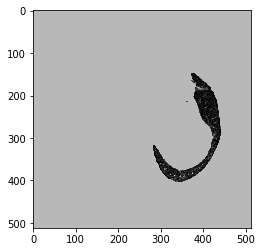

In [7]:
sample = lung_dataset[1224]
plt.imshow(sample[0], cmap='gray')
print("label: " + str(sample[1]))